In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r"C:\Users\rianl\OneDrive\Desktop\Akhil\Data Science and ML\Census Income\census-income.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Unnamed: 14'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace("-",".")

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'Unnamed: 14'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace("_",".")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'Unnamed: 14'],
      dtype='object')

In [7]:
df = df.replace('?', 'NaN')

In [7]:
df.head(18
       )

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
df = df.replace('NaN', np.nan)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
Unnamed: 14       0
dtype: int64

In [10]:
df.dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df = df.rename(columns = {'fnlwgt':'Final weight'})
df

,age,workclass,Final weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 4. Logistic Regression:

# A) Simple Logistic Regression

In [13]:
col_list=list(df.columns)

In [14]:
col_list

['age',
 'workclass',
 'Final weight',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'Unnamed: 14']

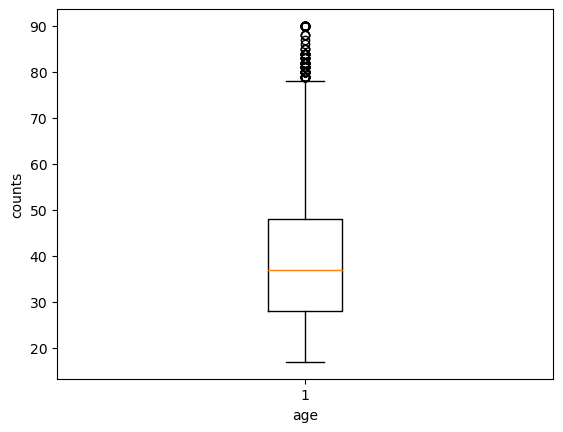

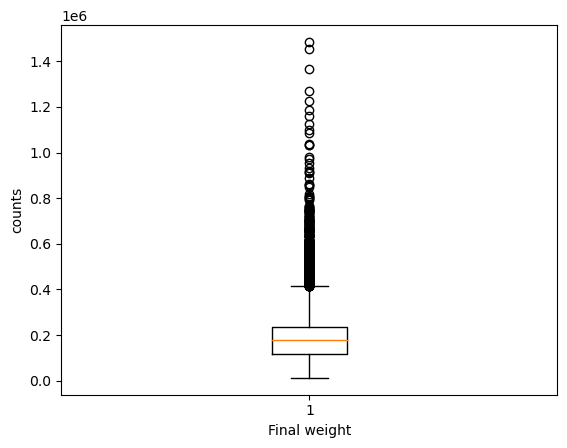

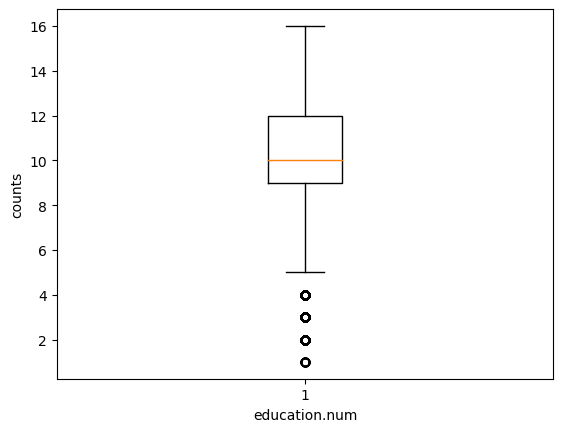

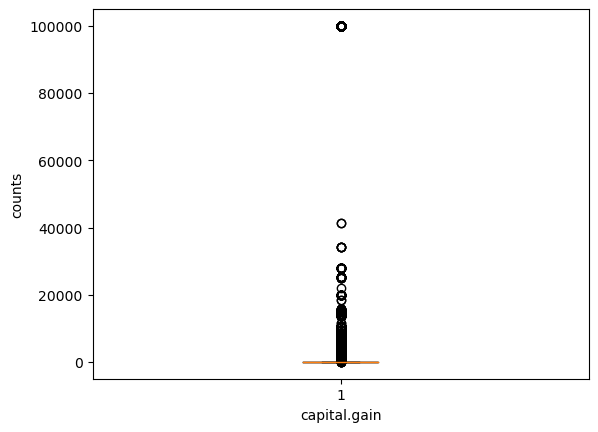

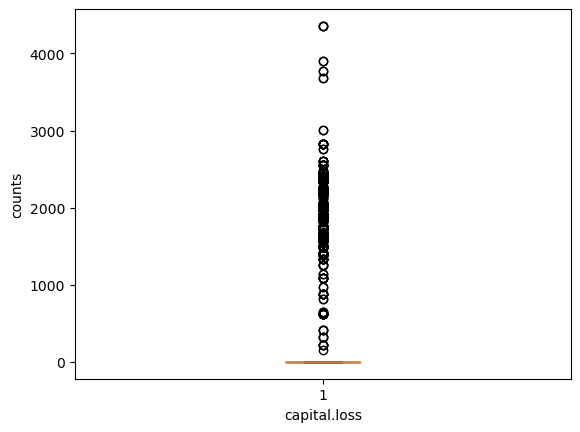

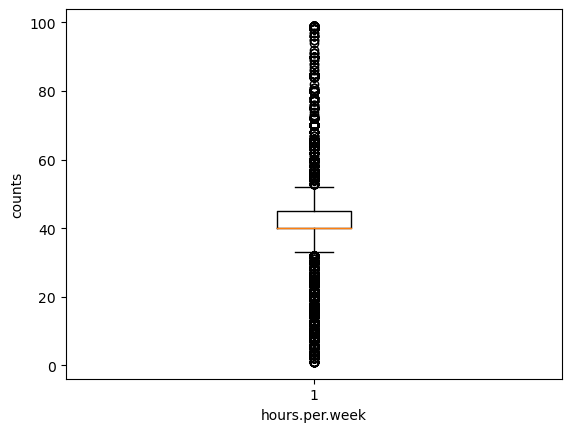

In [15]:
for i in col_list:
    if df[i].dtype==object:
        pass
    else:
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('counts')
        plt.show()

In [16]:
#Removing the outliers by defining q1,q3 and IQR
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print(IQR)

age                   20.0
Final weight      119224.0
education.num          3.0
capital.gain           0.0
capital.loss           0.0
hours.per.week         5.0
dtype: float64


C:\Users\rianl\AppData\Local\Temp\ipykernel_229400\2484786612.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=df.quantile(0.25)
C:\Users\rianl\AppData\Local\Temp\ipykernel_229400\2484786612.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=df.quantile(0.75)


In [17]:
df=df[~((df<(q1-1.5*IQR)) | (df>q3+1.5*IQR)).any(axis=1)]

C:\Users\PRAKASH\AppData\Local\Temp/ipykernel_1932/2283517156.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(q1-1.5*IQR)) | (df>q3+1.5*IQR)).any(axis=1)]


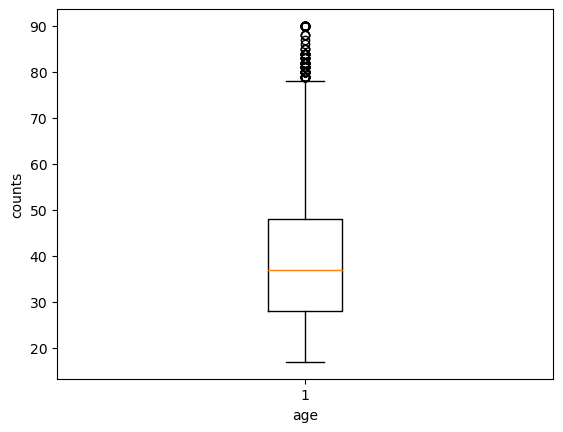

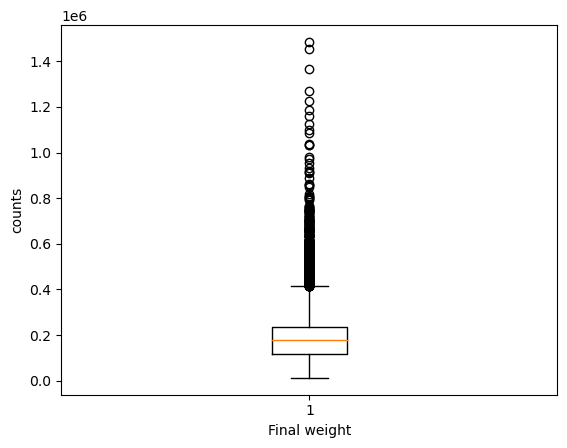

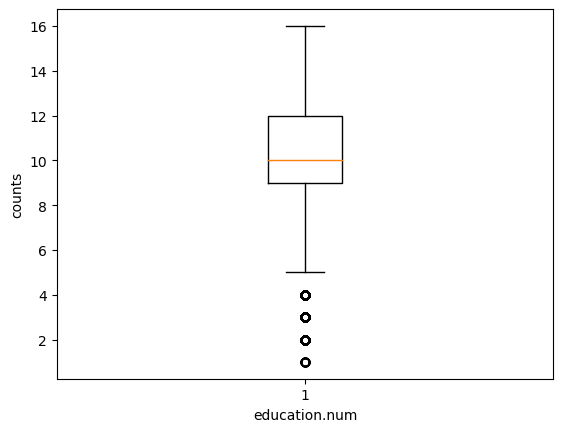

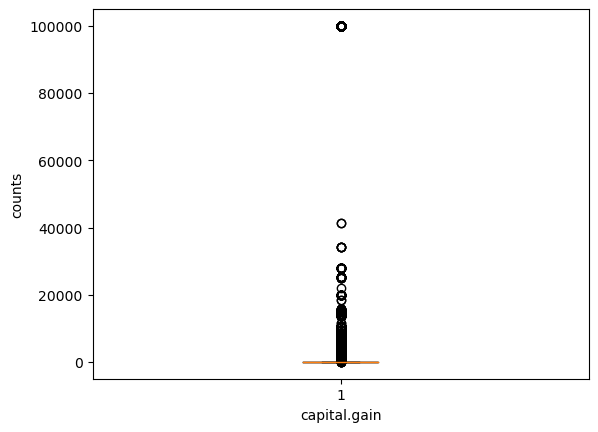

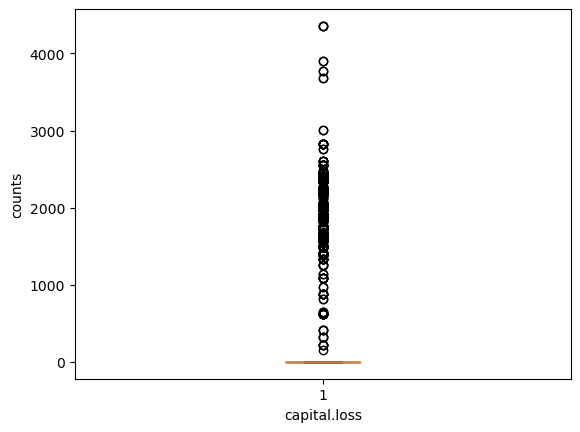

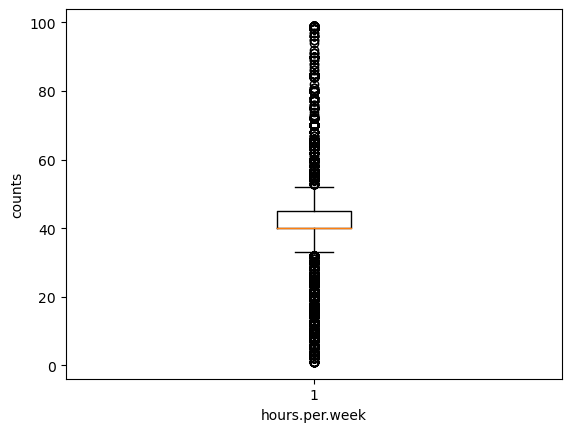

In [17]:
for i in col_list:
    if df[i].dtype==object:
        pass
    else:
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('counts')
        plt.show()

In [18]:
labelencoder=LabelEncoder()

In [19]:
for i in col_list:
    df[i]=labelencoder.fit_transform(df[i])

In [20]:
df

,age,workclass,Final weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0


In [21]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   3.724398
1        workclass   8.450224
2     Final weight   3.830888
3        education   9.187800
4    education.num  16.497184
5   marital.status   4.093760
6       occupation   3.709026
7     relationship   2.665862
8             race  17.252506
9              sex   4.460860
10    capital.gain   1.244007
11    capital.loss   1.089626
12  hours.per.week  11.878895
13  native.country  19.241328
14     Unnamed: 14   1.862462


In [23]:
df=df.drop('native.country', axis=1)

In [22]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   3.724398
1        workclass   8.450224
2     Final weight   3.830888
3        education   9.187800
4    education.num  16.497184
5   marital.status   4.093760
6       occupation   3.709026
7     relationship   2.665862
8             race  17.252506
9              sex   4.460860
10    capital.gain   1.244007
11    capital.loss   1.089626
12  hours.per.week  11.878895
13  native.country  19.241328
14     Unnamed: 14   1.862462


In [25]:
df=df.drop(['capital.gain','capital.loss'], axis=1)

In [23]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   3.724398
1        workclass   8.450224
2     Final weight   3.830888
3        education   9.187800
4    education.num  16.497184
5   marital.status   4.093760
6       occupation   3.709026
7     relationship   2.665862
8             race  17.252506
9              sex   4.460860
10    capital.gain   1.244007
11    capital.loss   1.089626
12  hours.per.week  11.878895
13  native.country  19.241328
14     Unnamed: 14   1.862462


In [27]:
df=df.drop('race', axis=1)

In [24]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   3.724398
1        workclass   8.450224
2     Final weight   3.830888
3        education   9.187800
4    education.num  16.497184
5   marital.status   4.093760
6       occupation   3.709026
7     relationship   2.665862
8             race  17.252506
9              sex   4.460860
10    capital.gain   1.244007
11    capital.loss   1.089626
12  hours.per.week  11.878895
13  native.country  19.241328
14     Unnamed: 14   1.862462


In [26]:
df=df.drop('education', axis=1)

In [25]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   3.724398
1        workclass   8.450224
2     Final weight   3.830888
3        education   9.187800
4    education.num  16.497184
5   marital.status   4.093760
6       occupation   3.709026
7     relationship   2.665862
8             race  17.252506
9              sex   4.460860
10    capital.gain   1.244007
11    capital.loss   1.089626
12  hours.per.week  11.878895
13  native.country  19.241328
14     Unnamed: 14   1.862462


In [27]:
df

,age,workclass,Final weight,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,22,7,2671,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,8,4,1,3,4,1,0,0,19,39,0


In [28]:
# ii) Build a logistic regression model where the dependent variable is 
# “X”(yearly income) and the independent variable is “occupation”.

x=pd.DataFrame(df.iloc[:,5])
x

,occupation
0,1
1,4
2,6
3,6
4,10
...,...
32556,13
32557,7
32558,1
32559,1


In [29]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Unnamed: 14, Length: 32561, dtype: int32

In [31]:
# i) Divide the dataset into training and test sets in 70:30 ratio.

x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.70, random_state=0)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22792, 1)
(22792,)
(9769, 1)
(9769,)


In [33]:
simple_model=LogisticRegression()

In [35]:
simple_model.fit(x_train,y_train)

LogisticRegression()

In [36]:
# iii) Predict the values on the test set

predictions1 = simple_model.predict(x_test)

In [37]:
predictions1

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# iv) Build a confusion matrix and find the accuracy.
print('Accuracy of Simple Logistic Regression Model: ')
print(accuracy_score(y_test, predictions1))

Accuracy of Simple Logistic Regression Model: 
0.7582147609786057


In [39]:
print('Confusion Matrix of Simple Logistic Regression Model: ')
print(confusion_matrix(y_test, predictions1))

Confusion Matrix of Simple Logistic Regression Model: 
[[7407    0]
 [2362    0]]


# b) Build a Multiple Logistic Regression model

In [40]:
# ii)  Build a logistic regression model where the dependent variable is 
# “X”(yearly income) and independent variables are “age”, “workclass”, and “education”

x2=pd.DataFrame(df.iloc[:,[0,1,3]])
x2

,age,workclass,education.num
0,22,7,12
1,33,6,12
2,21,4,8
3,36,4,6
4,11,4,12
...,...,...,...
32556,10,4,11
32557,23,4,8
32558,41,4,8
32559,5,4,8


In [41]:
y2=df.iloc[:,-1]
y2

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Unnamed: 14, Length: 32561, dtype: int32

In [42]:
# i) Divide the dataset into training and test sets in 80:30 ratio.

x_train, x_test, y_train, y_test=train_test_split(x2,y2, train_size=0.80, random_state=0)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26048, 3)
(26048,)
(6513, 3)
(6513,)


In [44]:
multiple_model=LogisticRegression()

In [45]:
multiple_model.fit(x_train,y_train)

LogisticRegression()

In [46]:
predictions2 = multiple_model.predict(x_test)

In [47]:
predictions2

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
# iv) Build a confusion matrix and find the accuracy.
print('Accuracy of Multiple Logistic Regression Model: ')
print(accuracy_score(y_test, predictions2))

Accuracy of Multiple Logistic Regression Model: 
0.7802855826807923


In [49]:
print('Confusion Matrix of Multiple Logistic Regression Model: ')
print(confusion_matrix(y_test, predictions2))

Confusion Matrix of Multiple Logistic Regression Model: 
[[4624  294]
 [1137  458]]


# 5. Decision Tree:

In [50]:
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [51]:
x3=(df.iloc[:,:-1])
x3

,age,workclass,Final weight,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,22,7,2671,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,12,2,10,5,2,0,0,0,39,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,11,2,13,5,4,0,0,0,37,39
32557,23,4,8080,8,2,7,0,4,1,0,0,39,39
32558,41,4,7883,8,6,1,4,4,0,0,0,39,39
32559,5,4,12881,8,4,1,3,4,1,0,0,19,39


In [52]:
y3=df.iloc[:,-1]
y3

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Unnamed: 14, Length: 32561, dtype: int32

In [53]:
# i) Divide the dataset into training and test sets in 70:30 ratio.
x_train, x_test, y_train, y_test=train_test_split(x3,y3, train_size=0.70, random_state=0)

In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22792, 13)
(22792,)
(9769, 13)
(9769,)


In [55]:
# ii) Build a decision tree model where the dependent variable is “X”(Yearly Income) 
# and the rest of the variables as independent variables.

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [56]:
# iii) Predict the values on the test set.

y_train_pred

array([1, 0, 1, ..., 0, 1, 0])

In [57]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} ConfusionMatrix')
    cf = confusion_matrix(y_train_pred,y_train) 
    sns.heatmap(cf, annot=True,cmap = 'Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.8090899785034292
Train ConfusionMatrix


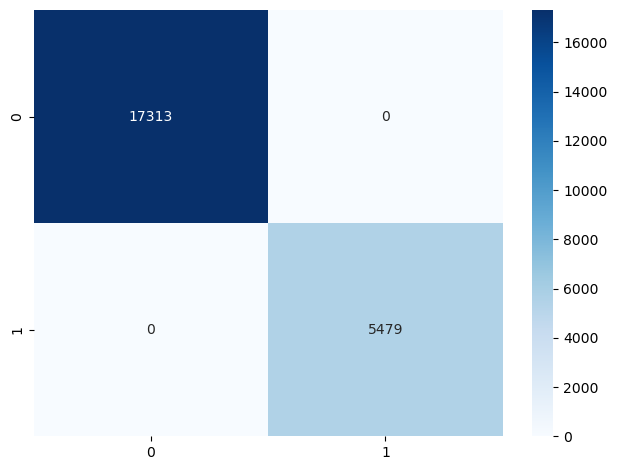

Test ConfusionMatrix


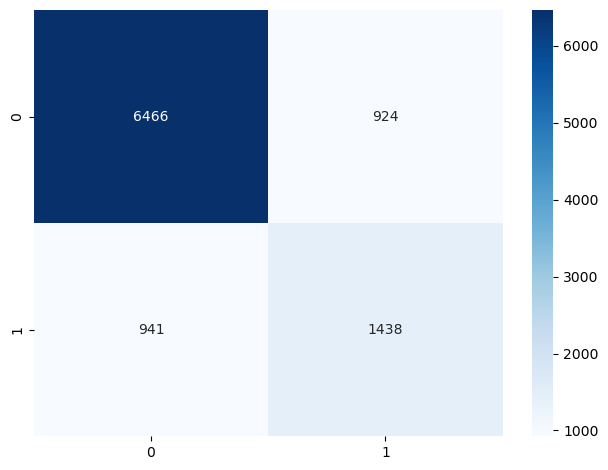

In [58]:
# iv) Build a confusion matrix and calculate the accuracy

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [59]:
params = {'max_depth' : [2,4,6,8,10,12], 
          'min_samples_split' : [2,3,4], 
          'min_samples_leaf': [1,2]} 
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params) 
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8631976131976132
Test score 0.8547446002661481
Train ConfusionMatrix


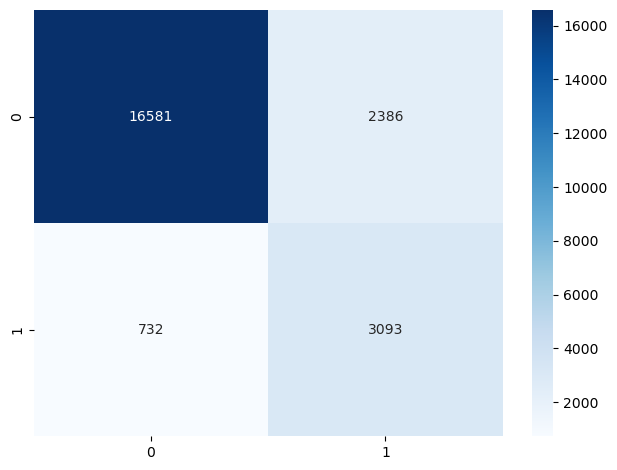

Test ConfusionMatrix


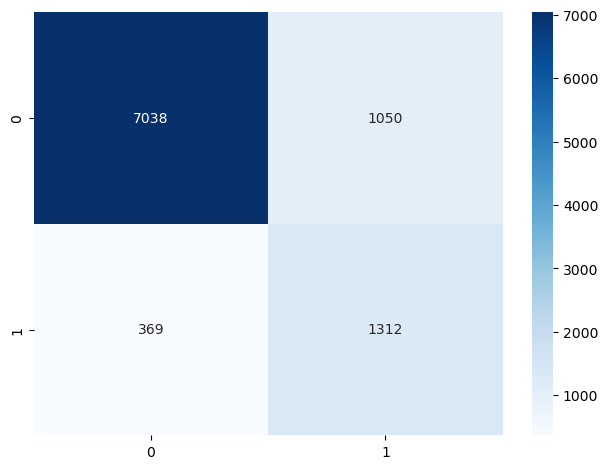

In [60]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [61]:
path = clf.cost_complexity_pruning_path(x_train,y_train)

ccp_alphas,impurities = path.ccp_alphas, path.impurities 
print(ccp_alphas)

[0.00000000e+00 1.73592565e-05 1.74648233e-05 ... 2.02089880e-02
 2.62705011e-02 5.96861323e-02]


In [62]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)

KeyboardInterrupt: 

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts =[clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle='steps-post')
plt.plot(ccp_alphas,depth,label='depth',drawstyle='steps-post')
plt.legend()

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
  y_train_pred = c.predict(x_train)
  y_test_pred = c.predict(x_test)
  train_acc.append(accuracy_score(y_train_pred, y_train))
  test_acc.append(accuracy_score(y_test_pred, y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas, train_acc,label="train_accuracy",drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label="test_accuracy",drawstyle="steps-post")
plt.legend()
plt.title("Accuracy vs alpha")
plt.show()

In [ ]:
clf_ = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

# 6. Random Forest:

In [63]:
# i) Divide the dataset into training and test sets in 80:20 ratio.

x_train,x_test,y_train,y_test = train_test_split(x3,y3,train_size=0.80,random_state=0)
print(x_train.shape,x_test.shape)

(26048, 13) (6513, 13)


In [64]:
clfy = RandomForestClassifier(n_estimators = 300)

In [68]:
clfy.fit(x_train,y_train)
y_train_pred = clfy.predict(x_train)
y_test_pred = clfy.predict(x_test)

In [69]:
y_test_pred

array([0, 0, 0, ..., 1, 0, 1])

In [70]:
#iii. Build the confusion matrix and calculate the accuracy 

def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} ConfusionMatrix')
    cf = confusion_matrix(y_train_pred,y_train) 
    sns.heatmap(cf, annot=True,cmap = 'Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.8530631045601106
Train ConfusionMatrix


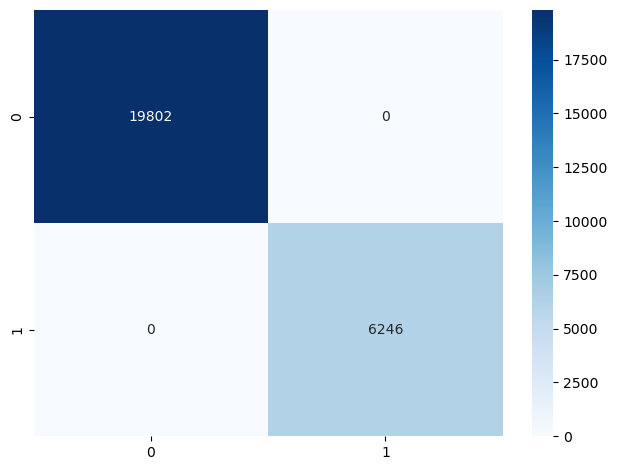

Test ConfusionMatrix


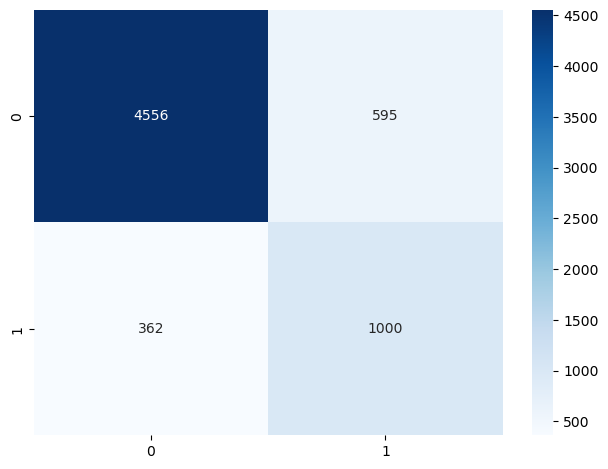

In [71]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [72]:
params = {'max_depth' : [2,4,6,8,10,12], 
          'min_samples_split' : [2,3,4], 
          'min_samples_leaf': [1,2]} 
clfy = RandomForestClassifier(n_estimators = 300)
gcv = GridSearchCV(estimator=clfy,param_grid=params) 
gcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=300),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8878992628992629
Test score 0.8592046675879011
Train ConfusionMatrix


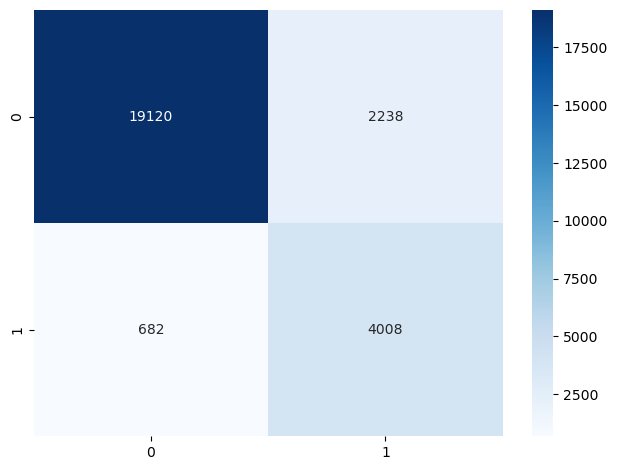

Test ConfusionMatrix


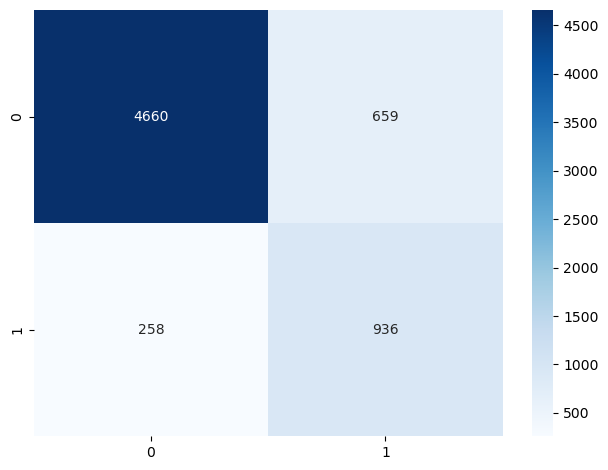

In [73]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')